<a href="https://colab.research.google.com/github/Rishu-N/Python-for-Data-Science-/blob/master/DL_LAB_DA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NAME - RISHU NAND
#REGISTRATION NUMBER - 21BCE2752

In [4]:
import keras
from keras.models import Sequential
from keras. layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
#from keras.utils import np_utils
import itertools


In [12]:
from numpy import load

data = load('/content/ORL_faces.npz')
lst = data.files
for item in lst:
    print(item)
    print(data[item])

testY
[ 0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14
 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19]
testX
[[ 41.  47.  47. ...  35.  37.  38.]
 [ 44.  43.  32. ...  43.  43.  37.]
 [ 42.  41.  44. ...  42.  43.  41.]
 ...
 [101. 100. 103. ...  31.  40.  42.]
 [105. 108. 106. ...  44.  40.  47.]
 [113. 114. 111. ...  62.  81.  89.]]
trainX
[[ 48.  49.  45. ...  47.  46.  46.]
 [ 60.  60.  62. ...  32.  34.  34.]
 [ 39.  44.  53. ...  29.  26.  29.]
 ...
 [114. 117. 114. ...  98.  96.  98.]
 [105. 105. 107. ...  54.  47.  41.]
 [116. 114. 117. ...  95. 100. 101.]]
trainY
[ 0  0  0  0  0  0  0  0  0  0

In [15]:
#load dataset
#data = np.load('/content/ORL_faces.npz')
# load the "Train Images"
x_train = data['trainX']
#normalize every image
x_train = np.array(x_train, dtype='float32') /255
x_test = data['testX']
x_test = np.array (x_test,dtype='float32') /255
# load the Label of Images
y_train= data['trainY']
y_test= data['testY']

In [19]:
print('x_train : {}.' .format(x_train[:]))
print('Y-train shape:{}.'.format(y_train))
print('x_test shape:{}.'.format(x_test. shape) )

x_train : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]].
Y-train shape:[ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 1

In [21]:
x_train, x_valid, y_train, y_valid= train_test_split(x_train, y_train, test_size=.05, random_state=1234,)

In [26]:
im_rows=112
im_cols=92
batch_size=512
im_shape=(im_rows, im_cols, 1)
#change the size of images
x_train = x_train. reshape(x_train.shape[0], *im_shape)
x_test = x_test. reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)
print('x train shape: .{}'.format (y_train. shape [0]))
print('x_test shape: {}.'.format (y_test. shape) )


x train shape: .228
x_test shape: (160,).


In [31]:
cnn_model= Sequential([
Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
MaxPooling2D(pool_size=2),
Conv2D (filters=54,kernel_size=5, activation='relu', input_shape= im_shape),
MaxPooling2D(pool_size=2),
Flatten (),
Dense (2024, activation='relu'),
Dropout (0.5),
Dense (1024, activation='relu'),
Dropout (0.5),
Dense (512, activation='relu'),
Dropout(0.5),
#20 is the number of outputs
Dense (20, activation='softmax')
])
cnn_model. compile(
loss= 'sparse_categorical_crossentropy' ,#'categorical_crossentropy', optimizer=Adam (r=0.0001) ,
metrics=['accuracy']
)

In [33]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 106, 86, 36)         │           1,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 53, 43, 36)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 49, 39, 54)          │          48,654 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 24, 19, 54)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 24624)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2024)                │      49,841,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1024)                │       2,073,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 20)                  │          10,260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,500,114 (200.27 MB)

 Trainable params: 52,500,114 (200.27 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history = cnn_model.fit(np.array(x_train),np.array(y_train),batch_size = 512, epochs = 250, verbose = 2, validation_data = (np.array(x_valid),np.array(y_valid)))

Epoch 1/250
1/1 - 0s - 212ms/step - accuracy: 0.0965 - loss: 2.7475 - val_accuracy: 0.1667 - val_loss: 2.8835
Epoch 2/250
1/1 - 0s - 168ms/step - accuracy: 0.0570 - loss: 3.1042 - val_accuracy: 0.2500 - val_loss: 2.8433
Epoch 3/250
1/1 - 0s - 136ms/step - accuracy: 0.3026 - loss: 2.8311 - val_accuracy: 0.0833 - val_loss: 2.6400
Epoch 4/250
1/1 - 0s - 139ms/step - accuracy: 0.2895 - loss: 2.5857 - val_accuracy: 0.1667 - val_loss: 2.3486
Epoch 5/250
1/1 - 0s - 119ms/step - accuracy: 0.2763 - loss: 2.3368 - val_accuracy: 0.3333 - val_loss: 2.4840
Epoch 6/250
1/1 - 0s - 116ms/step - accuracy: 0.3158 - loss: 2.4391 - val_accuracy: 0.0000e+00 - val_loss: 3.0938
Epoch 7/250
1/1 - 0s - 142ms/step - accuracy: 0.2193 - loss: 2.6581 - val_accuracy: 0.0000e+00 - val_loss: 11.8237
Epoch 8/250
1/1 - 0s - 128ms/step - accuracy: 0.0789 - loss: 10.9119 - val_accuracy: 0.1667 - val_loss: 2.6988
Epoch 9/250
1/1 - 0s - 130ms/step - accuracy: 0.0921 - loss: 2.9503 - val_accuracy: 0.3333 - val_loss: 2.6054


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


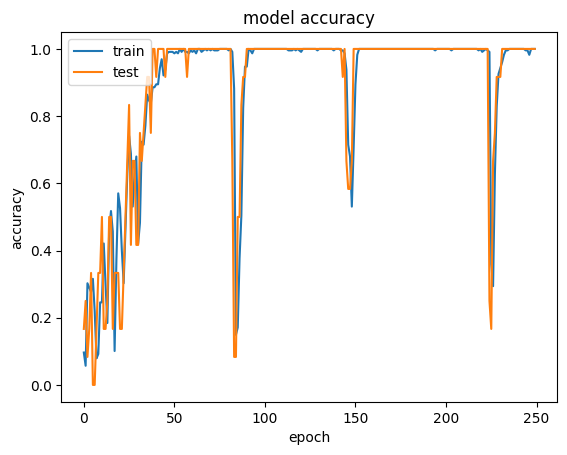

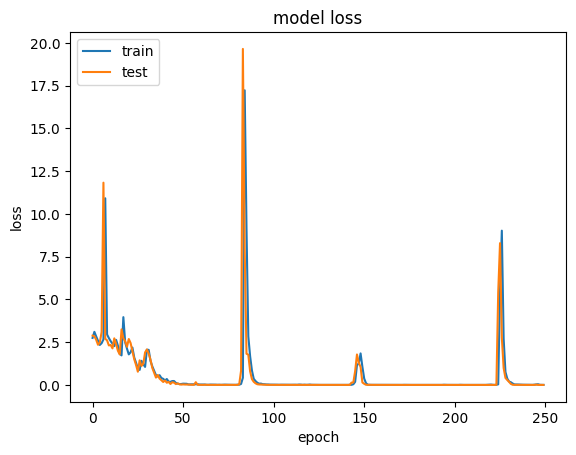

In [42]:

print(history.history.keys())
plt. plot (history.history['accuracy'])
plt. plot (history. history['val_accuracy'])
plt. title( 'model accuracy')
plt . ylabel ( 'accuracy')
plt. xlabel('epoch')
plt. legend (['train', 'test'], loc='upper left')
plt. show()
# summarize history for loss
plt.plot(history. history['loss'])
plt.plot(history.history['val_loss'])
plt. title('model loss')
plt. ylabel( 'loss')
plt. xlabel ('epoch')
plt. legend (['train', 'test'], loc='upper left')
plt.show( )
#dict_keys(['val_loss', 'val _acc', 'loss', 'acc'])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Accuracy:  0.9375
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 6 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 6 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
Accuracy:  0.9375
Confusion Matrix, without normalization


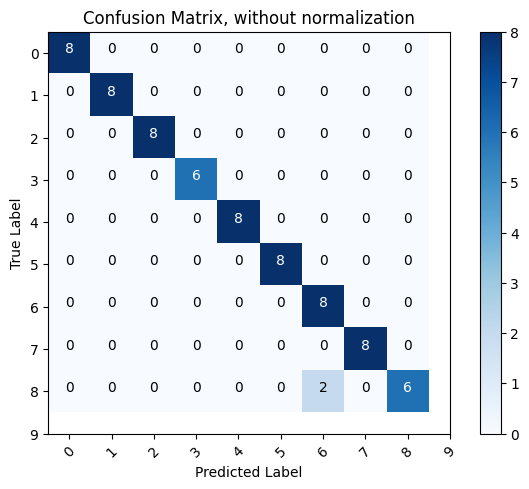

Confusion Matrix, without normalization


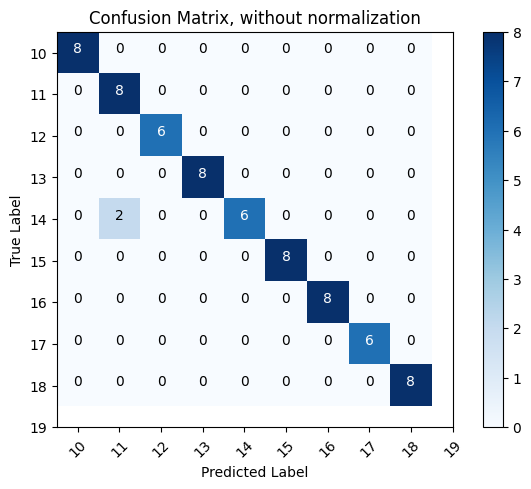

Confusion matrix:
 [[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 6 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 6 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           

In [48]:
preds = np.argmax(cnn_model.predict(x_test), axis=1)

accuracy = accuracy_score(y_test, preds)
print('Accuracy: ', accuracy)

conf_matrix = confusion_matrix(np.array(y_test), preds)
def plot_conf_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        print('Confusion Matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

print(conf_matrix)

print('Accuracy: ', accuracy)
plt.figure()
plot_conf_matrix(conf_matrix[1:10, 1:10], classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                     title='Confusion Matrix, without normalization')
plt.figure()
plot_conf_matrix(conf_matrix[11:20, 11:20], classes = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], title='Confusion Matrix, without normalization')
print('Confusion matrix:\n %s' % confusion_matrix(np.array(y_test), preds))


print(classification_report(np.array(y_test), preds))